## Tigray War Demand and Utility Analysis

##### *This notebook walks through the cleaning and analysis of Ehtiopia's food and expenditure data to understand the impacts of the Tigray War on demand and utility.*

In [1]:
!pip install -r requirements.txt

In [2]:
Ethiopia_Data = '1PVqM25qZyDz5K3jsLDu-JgPS5-vmro4wHk8k6OIB9Eo'

In [3]:
import pandas as pd
import numpy as np
from eep153_tools.sheets import read_sheets

# Change 'Uganda_Data' to key of your own sheet in Sheets, above
x = read_sheets(Ethiopia_Data,sheet='Food Expenditures (2018-19)')
x = x.set_index(['i','t','m','j']).squeeze()


# Now prices
p = read_sheets(Ethiopia_Data,sheet='Food Prices (2018-19)').set_index(['t','m','j','u'])

p = p['Price']

# Compute medians of prices for particular time, place and unit
p = p.groupby(['t','m','j','u']).median()

# Just keep metric units
p = p.xs('Kg',level="u").squeeze().unstack('j')

jidx = p.columns.intersection(x.index.levels[-1])
# Drop prices for goods we don't have expenditures for
p = p[jidx].T

# Household characteristics
d = read_sheets(Ethiopia_Data,sheet="Household Characteristics")
d.columns.name = 'k'

# Fill blanks with zeros
d = d.replace(np.nan,0)

# Expenditures x may have duplicate columns
x = x.T.groupby(['i','t','m','j']).sum()
x = x.replace(0,np.nan) # Replace zeros with missing

# Take logs of expenditures; call this y
y = np.log(x)

d.set_index(['i','t','m'],inplace=True)

In [4]:
d.head()

k                             Females 00-03  Females 04-08  Females 09-13  \
i             t       m                                                     
1010101601002 2011-12 Tigray              0              0              1   
              2013-14 Tigray              1              1              1   
              2015-16 Tigray              0              0              0   
1010101601017 2011-12 Tigray              0              1              1   
              2013-14 Tigray              1              1              1   

k                             Females 14-18  Females 19-30  Females 31-50  \
i             t       m                                                     
1010101601002 2011-12 Tigray              0              0              1   
              2013-14 Tigray              0              0              1   
              2015-16 Tigray              0              0              0   
1010101601017 2011-12 Tigray              0              0              1   
              2013-14 Tigray              0              1              0   

k                             Females 51-99  Males 00-03  Males 04-08  \
i             t       m                                                 
1010101601002 2011-12 Tigray              1            0            1   
              2013-14 Tigray              1            0            1   
              2015-16 Tigray              1            0            0   
1010101601017 2011-12 Tigray              0            0            0   
              2013-14 Tigray              0            0            1   

k                             Males 09-13  Males 14-18  Males 19-30  \
i             t       m                                               
1010101601002 2011-12 Tigray            1            1            0   
              2013-14 Tigray            0            1            0   
              2015-16 Tigray            0            0            0   
1010101601017 2011-12 Tigray            2            0            0   
              2013-14 Tigray            1            1            0   

k                             Males 31-50  Males 51-99  log HSize  
i             t       m                                            
1010101601002 2011-12 Tigray            1            0   1.945910  
              2013-14 Tigray            1            0   2.079442  
              2015-16 Tigray            0            0   0.000000  
1010101601017 2011-12 Tigray            1            0   1.791759  
              2013-14 Tigray            1            0   2.079442

In [5]:
from cfe import Regression

result = Regression(y=y,d=d)

In [6]:
result.predicted_expenditures()

i                   t        m       j       
010101088800910017  2018-19  Tigray  Banana       13.616372
                                     Barley       29.423663
                                     Beef        152.220021
                                     Beetroot      9.713831
                                     Berbere      18.635439
                                                    ...    
7.10031E+16         2018-19  SNNP    Sugar         8.199711
                                     Tea           6.688172
                                     Teff         65.156824
                                     Tomato        7.975005
                                     Wheat        22.539978
Length: 191958, dtype: float64

<Axes: xlabel='yhat', ylabel='y'>

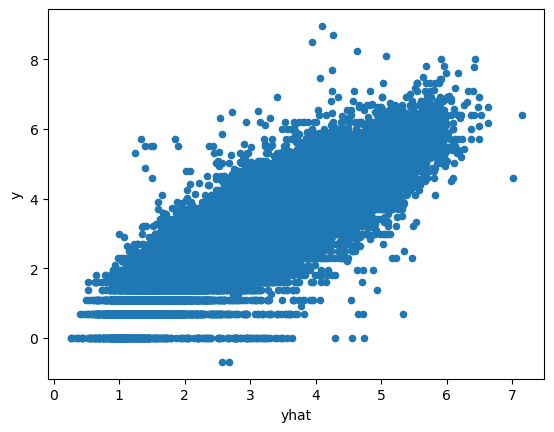

In [7]:
%matplotlib inline
df = pd.DataFrame({'y':y,'yhat':result.get_predicted_log_expenditures()})
df.plot.scatter(x='yhat',y='y')

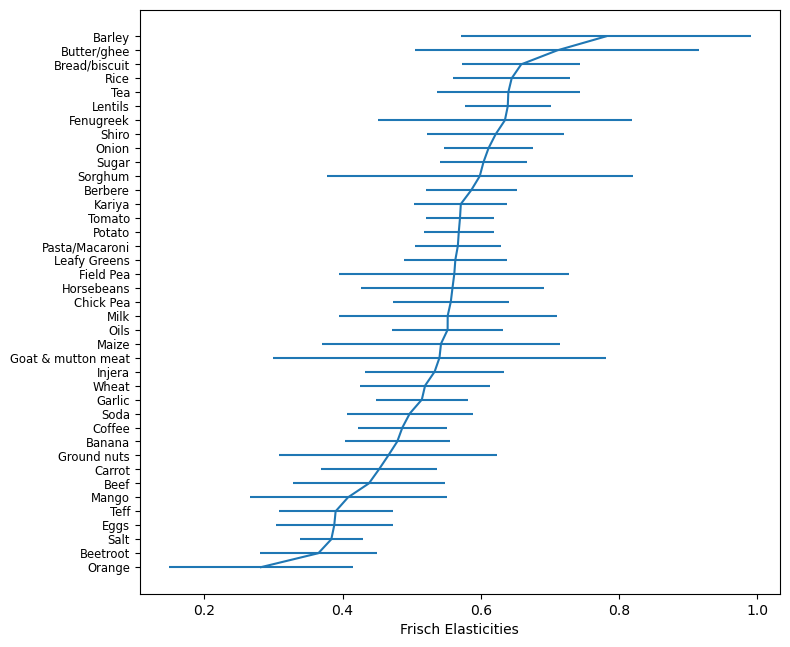

In [8]:
ax = result.graph_beta()

In [9]:
result.get_beta()

j
Banana                0.479178
Barley                0.780838
Beef                  0.438144
Beetroot              0.365002
Berbere               0.586266
Bread/biscuit         0.658454
Butter/ghee           0.710548
Carrot                0.452613
Chick Pea             0.556580
Coffee                0.486573
Eggs                  0.388004
Fenugreek             0.634856
Field Pea             0.561645
Garlic                0.514700
Goat & mutton meat    0.540216
Ground nuts           0.466189
Horsebeans            0.559037
Injera                0.533212
Kariya                0.571094
Leafy Greens          0.563143
Lentils               0.638976
Maize                 0.542419
Mango                 0.407950
Milk                  0.552095
Oils                  0.551995
Onion                 0.611191
Orange                0.281921
Pasta/Macaroni        0.566775
Potato                0.568128
Rice                  0.644632
Salt                  0.383775
Shiro                 0.621482
Soda  

In [10]:
result.get_gamma()

k,Females 00-03,Females 04-08,Females 09-13,Females 14-18,Females 19-30,Females 31-50,Females 51-99,Males 00-03,Males 04-08,Males 09-13,Males 14-18,Males 19-30,Males 31-50,Males 51-99,log HSize,Constant
j,,,,,,,,,,,,,,,,
Banana,0.011810,-0.064620,0.000871,0.013443,0.133738,0.141644,0.126503,0.032934,-0.077769,-0.049908,-0.024724,0.047068,0.238964,0.059762,0.166232,3.186060
Barley,0.129997,0.022144,0.173119,0.077375,-0.023983,0.051273,0.124006,-0.139137,0.056104,-0.066169,0.095584,0.093987,-0.005463,0.006414,0.308662,3.280411
Beef,-0.038712,-0.143079,-0.044804,0.106981,0.082911,0.092443,0.093977,-0.017334,-0.050165,-0.076351,0.018740,0.046138,0.188003,0.155703,0.228814,5.246494
Beetroot,0.001029,0.022451,0.057436,0.076431,0.059910,0.023900,-0.043512,0.070262,0.071069,0.040267,0.120961,0.129963,0.122618,0.163502,-0.012407,2.569000
Berbere,-0.048073,-0.076586,-0.059522,0.014102,0.079845,0.109970,0.018191,-0.013862,-0.038025,-0.067903,-0.052288,0.012149,0.103575,0.015762,0.190950,3.278676
Bread/biscuit,-0.094437,-0.116391,-0.057850,-0.042674,-0.024460,-0.058130,-0.063316,-0.096493,-0.043789,0.006290,0.008206,-0.004942,0.105722,0.068624,0.520533,3.355363
Butter/ghee,-0.098656,-0.075701,-0.051734,-0.101765,-0.047569,-0.035877,-0.051663,-0.054609,-0.235991,-0.156610,0.023816,-0.203628,-0.137815,-0.237530,0.574928,4.063996
Carrot,-0.099693,-0.061000,-0.004635,0.124506,0.103096,0.082780,-0.039283,-0.039865,0.064992,-0.022887,0.013635,-0.029045,0.097049,0.049188,0.158515,2.586238
Chick Pea,-0.020002,0.065625,0.095818,0.039758,0.003700,-0.026125,0.038652,-0.027231,0.067941,0.005538,0.099321,0.063872,0.058138,0.181637,0.230669,3.171293


<Axes: ylabel='Density'>

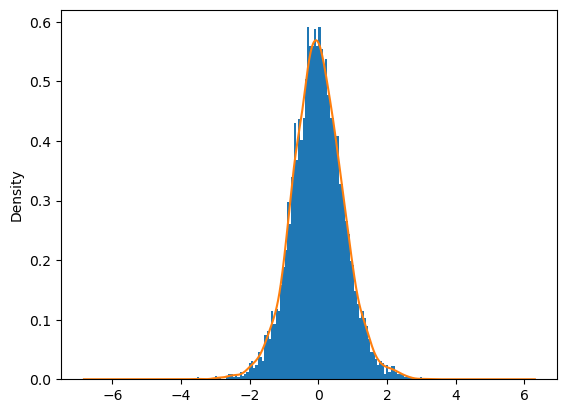

In [11]:
ax = result.get_w().plot.hist(bins=100,density=True)
result.get_w().plot.kde(ax=ax)

In [12]:
result.to_pickle('ethiopia_estimates.rgsn')

In [13]:
import cfe
result = cfe.regression.read_pickle('ethiopia_estimates.rgsn')

In [14]:
import numpy as np

xhat = result.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

In [15]:
# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar = p.mean(axis=1)
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

# Replace missing prices with 1 (this is because they're best measured in expenditures)
pbar = pbar.replace(np.nan,1)

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,j,p=pbar):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

Text(0.5, 0, 'Quantities of Milk Demanded')

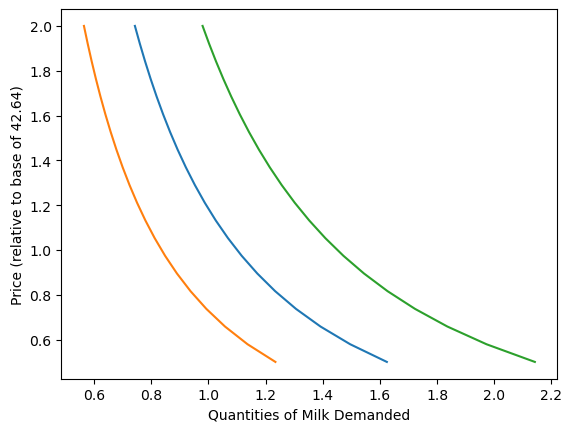

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

    # UNCOMMENT BELOW AND REPLACE STRING WITH FOOD
use = 'Milk'  # Good we want demand curve for

# Vary prices from 50% to 200% of reference.
scale = np.linspace(.5,2,20)

# Demand for Millet for household at median budget
plt.plot([result.demands(xref,my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 25% percentile
plt.plot([result.demands(xbar.quantile(0.25),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

# Demand for Millet for household at 75% percentile
plt.plot([result.demands(xbar.quantile(0.75),my_prices(pbar[use]*s,use,pbar))[use] for s in scale],scale)

plt.ylabel(f"Price (relative to base of {pbar[use]:.2f})")
plt.xlabel(f"Quantities of {use} Demanded")

Text(0.5, 1.0, 'Engel Curves')

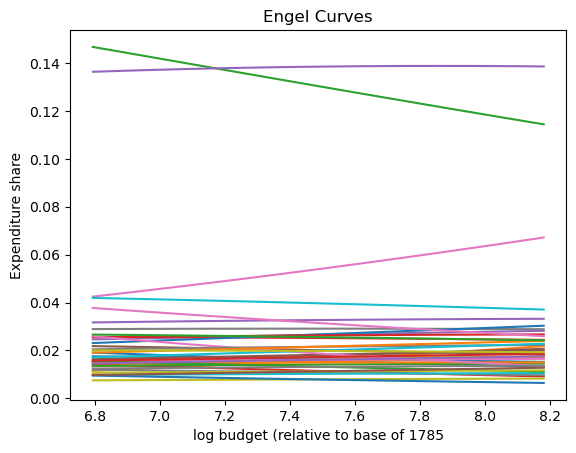

In [17]:
fig,ax = plt.subplots()

ax.plot(np.log(scale*xref),[result.expenditures(s*xref,pbar)/(s*xref) for s in scale])
ax.set_xlabel(f'log budget (relative to base of {xref:.0f}')
ax.set_ylabel(f'Expenditure share')
ax.set_title('Engel Curves')

Text(0.5, 1.0, 'Indirect Utility Function')

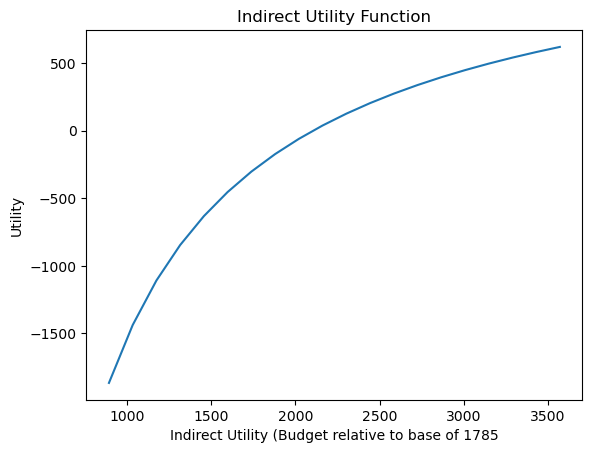

In [18]:
fig,ax = plt.subplots()

ax.plot(scale*xref,[result.indirect_utility(s*xref,pbar) for s in scale])
ax.set_xlabel(f'Indirect Utility (Budget relative to base of {xref:.0f}')
ax.set_ylabel(f'Utility')
ax.set_title('Indirect Utility Function')

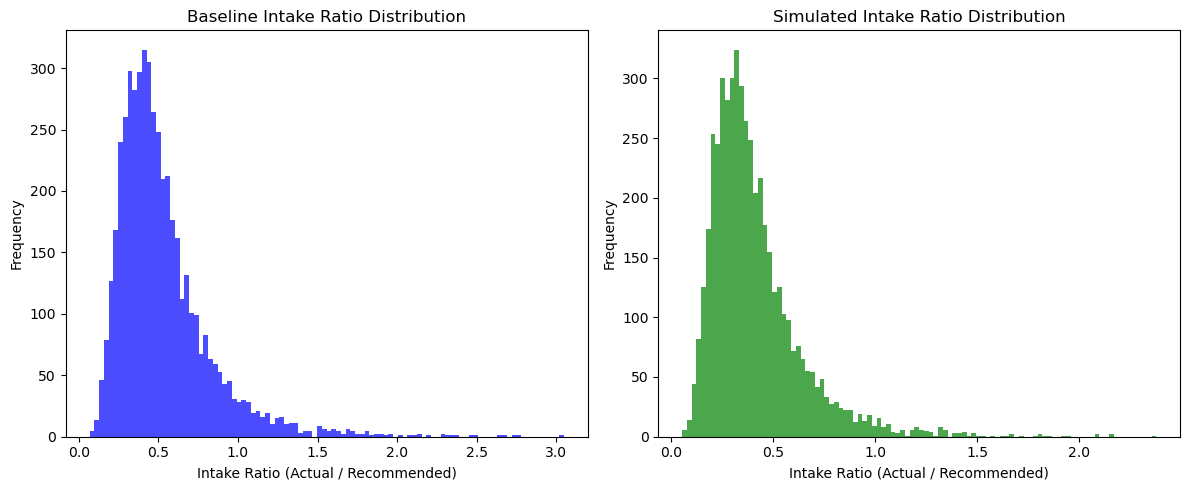

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from eep153_tools.sheets import read_sheets
from cfe import Regression, regression

Ethiopia_Data = '1PVqM25qZyDz5K3jsLDu-JgPS5-vmro4wHk8k6OIB9Eo'

# Expenditures
x = read_sheets(Ethiopia_Data, sheet='Food Expenditures (2018-19)')
x = x.set_index(['i','t','m','j']).squeeze()
x = x.T.groupby(['i','t','m','j']).sum()
x = x.replace(0, np.nan)

# Prices
p = read_sheets(Ethiopia_Data, sheet='Food Prices (2018-19)')
p = p[p['u'] == 'Kg']
p = p.set_index(['t','m','j'])
p = p['Price'].replace(0, np.nan)
p_df = p.unstack('j')

# Household Characteristics
d = read_sheets(Ethiopia_Data, sheet='Household Characteristics')
d.columns.name = 'k'
d = d.replace(np.nan, 0)
d = d.set_index(['i','t','m'])

# Food Conversion Table (FCT)
fct = read_sheets(Ethiopia_Data, sheet='FCT Sorted')
if 'index' in fct.columns:
    fct = fct.rename(columns={'index': 'j'})
fct = fct.set_index('j')
fct.columns.name = 'n'
fct = fct.apply(lambda x: pd.to_numeric(x, errors='coerce'))
fct.index = fct.index.astype(str).str.strip().str.lower()

fct.head

# Recommended Daily Intake (RDI)
rdi = read_sheets(Ethiopia_Data, sheet='rdas')
if 'Nutrient' in rdi.columns:
    rdi = rdi.set_index('Nutrient')
    for col in ['Unit', 'Constraint Type']:
        if col in rdi.columns:
            rdi = rdi.drop(columns=col)
elif 'n' not in rdi.columns:
    rdi = rdi.set_index(rdi.columns[0])
else:
    rdi = rdi.set_index('n')
rdi.columns.name = 'k'

# Estimate log-food expenditures using household characteristics.
y = np.log(x)
result = Regression(y=y, d=d)
result.to_pickle('./foo.pickle')
result = regression.read_pickle('foo.pickle')

# Predicted Expenditures & Quantities (Kg)
xhat = result.predicted_expenditures()
xhat_df = xhat.unstack('j')
qhat_list = []
idx_list = []
for idx, exp_row in xhat_df.iterrows():
    t, m = idx[1], idx[2]
    try:
        price_vector = p_df.loc[(t, m)]
        common_goods = exp_row.index.intersection(price_vector.index)
        q_row = exp_row[common_goods] / price_vector[common_goods]
        qhat_list.append(q_row)
        idx_list.append(idx)
    except KeyError:
        continue
qhat = pd.DataFrame(qhat_list, index=idx_list)
qhat = qhat.loc[:, qhat.count() > 0]
if isinstance(qhat.columns, pd.MultiIndex):
    qhat.columns = qhat.columns.get_level_values(0).str.strip().str.lower()
else:
    qhat.columns = qhat.columns.astype(str).str.strip().str.lower()

# Nutrient Intake Estimation via Baseline FCT
common_goods_baseline = fct.index.intersection(qhat.columns)
baseline_nutrients = qhat[common_goods_baseline].dot(fct.loc[common_goods_baseline])
baseline_nutrients.columns = baseline_nutrients.columns.astype(str).str.strip().str.lower()
if not isinstance(baseline_nutrients.index, pd.MultiIndex):
    baseline_nutrients.index = pd.MultiIndex.from_tuples(baseline_nutrients.index, names=['i','t','m'])


# Household Nutrient Requirements via RDI
d_adj = d.copy()
d_adj["Child_1_3"]   = d_adj["Females 00-03"] + d_adj["Males 00-03"]
d_adj["Female_4_8"]    = d_adj["Females 04-08"]
d_adj["Male_4_8"]      = d_adj["Males 04-08"]
d_adj["Female_9_13"]   = d_adj["Females 09-13"]
d_adj["Male_9_13"]     = d_adj["Males 09-13"]
d_adj["Female_14_18"]  = d_adj["Females 14-18"]
d_adj["Male_14_18"]    = d_adj["Males 14-18"]
d_adj["Female_19_30"]  = d_adj["Females 19-30"]
d_adj["Male_19_30"]    = d_adj["Males 19-30"]
d_adj["Female_31_50"]  = d_adj["Females 31-50"]
d_adj["Male_31_50"]    = d_adj["Males 31-50"]
d_adj["Female_51U"]    = d_adj["Females 51-99"]
d_adj["Male_51U"]      = d_adj["Males 51-99"]

demo_cols = ["Child_1_3", "Female_4_8", "Male_4_8", "Female_9_13", "Male_9_13",
             "Female_14_18", "Male_14_18", "Female_19_30", "Male_19_30",
             "Female_31_50", "Male_31_50", "Female_51U", "Male_51U"]
d_demo = d_adj[demo_cols]
common_demo = [col for col in rdi.columns if col in d_demo.columns]
d_demo = d_demo[common_demo]
hh_rdi = d_demo.dot(rdi[common_demo].T)
hh_rwi = hh_rdi * 28
hh_rwi.columns = hh_rwi.columns.astype(str).str.strip().str.lower()
if not isinstance(hh_rwi.index, pd.MultiIndex):
    hh_rwi.index = pd.MultiIndex.from_tuples(hh_rwi.index, names=['i','t','m'])


# 7. Simulate a New Scenario and Recalculate Nutrient Intakes
scenario_params = {
    "budget_multiplier": 0.8,
    "price_multipliers": {"teff": 1, "oils":1, "beef":10, "onion":1}
}
nutrientofinterest = "energy"

# Compute Baseline Intake Ratio Distribution
baseline_protein_ratio = baseline_nutrients[nutrientofinterest] / hh_rwi[nutrientofinterest]

budget_mult = scenario_params["budget_multiplier"]
price_mult_lower = {k.lower(): v for k, v in scenario_params.get("price_multipliers", {}).items()}
simulated_q = qhat.copy()
for good in simulated_q.columns:
    good_lower = good.lower()
    if good_lower in price_mult_lower:
        simulated_q[good] = simulated_q[good] * (budget_mult / price_mult_lower[good_lower])
    else:
        simulated_q[good] = simulated_q[good] * budget_mult

# Recalculate nutrient intakes for the simulated scenario.
common_goods_sim = fct.index.intersection(simulated_q.columns)
if common_goods_sim.empty:
    raise KeyError("No common goods found between simulated consumption and FCT.")
simulated_nutrients = simulated_q[common_goods_sim].dot(fct.loc[common_goods_sim])
simulated_nutrients.columns = simulated_nutrients.columns.astype(str).str.strip().str.lower()
if not isinstance(simulated_nutrients.index, pd.MultiIndex):
    simulated_nutrients.index = pd.MultiIndex.from_tuples(simulated_nutrients.index, names=['i','t','m'])
# Compute the simulated protein intake ratio.
simulated_protein_ratio = simulated_nutrients[nutrientofinterest] / hh_rwi[nutrientofinterest]

# Plot the Baseline and Simulated Intake Distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(baseline_protein_ratio, bins=100, color="blue", alpha=0.7)
plt.xlabel("Intake Ratio (Actual / Recommended)")
plt.ylabel("Frequency")
plt.title("Baseline Intake Ratio Distribution")

plt.subplot(1, 2, 2)
plt.hist(simulated_protein_ratio, bins=100, color="green", alpha=0.7)
plt.xlabel("Intake Ratio (Actual / Recommended)")
plt.ylabel("Frequency")
plt.title("Simulated Intake Ratio Distribution")

plt.tight_layout()
plt.show()

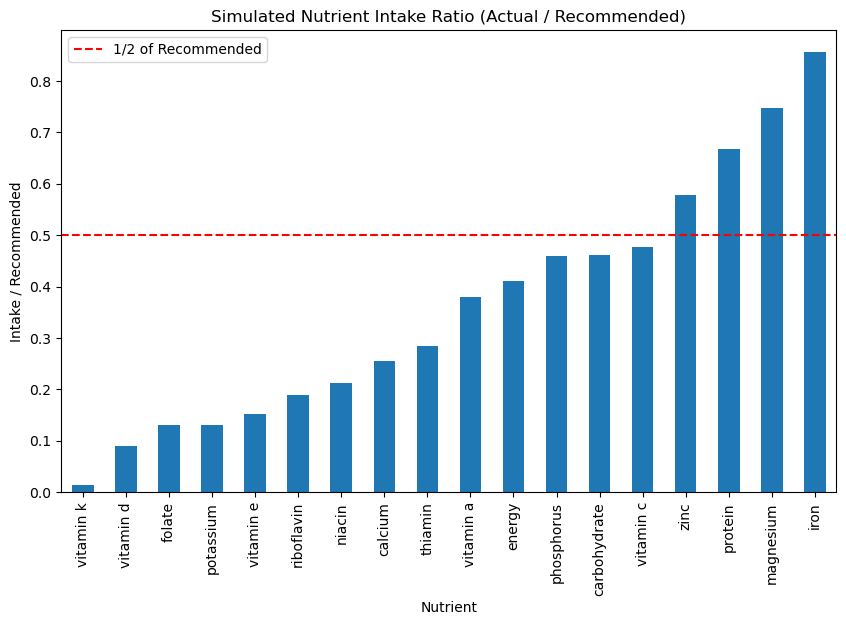

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Normalize the price vector index
pbar.index = pbar.index.str.lower()

def simulate_scenario(budget_multiplier=1.0, price_multipliers=None):
    """
    Simulate a scenario by scaling total expenditure and adjusting prices.
    Uses the global variables xref, pbar, and result.
    
    Returns:
      simulated_demands: Consumption in Kg per household for each food type.
      total_consumption: Total consumption (Kg) for the representative household.
    """
    # Compute baseline demands (per household)
    baseline_demands = result.demands(xref, pbar)

    # Adjust the overall budget using a multiplier
    new_budget = xref * budget_multiplier

    # Create an adjusted price vector 
    new_prices = pbar.copy()
    if price_multipliers is not None:
        for good, multiplier in price_multipliers.items():
            good_lower = good.lower()
            if good_lower in new_prices.index:
                new_prices.loc[good_lower] = pbar.loc[good_lower] * multiplier
            else:
                print(f"Warning: {good} not found in the price vector.")
                
    # Compute simulated demands for the new scenario (Kg per household)
    simulated_demands = result.demands(new_budget, new_prices)
    total_consumption = simulated_demands.sum()  # total consumption (Kg) for the representative household
    
    return simulated_demands, total_consumption

# Run your scenario simulation using the parameters in scenario_params
simulated_demands, total_consumption = simulate_scenario(**scenario_params)

# Number of households in the dataset:
n_households = d.shape[0]

# (Optional) Compute total number of persons in the dataset:
# List the demographic columns (adjust these to match your actual column names exactly)
demog_cols = ["Females 00-03", "Females 04-08", "Females 09-13", "Females 14-18", 
              "Females 19-30", "Females 31-50", "Females 51-99", "Males 00-03", 
              "Males 04-08", "Males 09-13", "Males 14-18", "Males 19-30", 
              "Males 31-50", "Males 51-99"]
total_persons = d[demog_cols].sum().sum()

# Compute total consumption (Kg) of each food type across the entire dataset.
# Here we assume simulated_demands is given in Kg per household.
total_consumption_by_food = simulated_demands * n_households

# Compute consumption per person (Kg) for each food type.
consumption_per_person = total_consumption_by_food / total_persons

# Proceed with the rest of your analysis:
simulated_demands.index = simulated_demands.index.astype(str).str.strip().str.lower()
use_goods_sim = fct.index.intersection(simulated_demands.index)
if use_goods_sim.empty:
    raise KeyError("No common goods found between simulated demands and FCT.")

# Calculate nutrient intake for the simulated scenario via dot-product.
nutrients_sim = simulated_demands[use_goods_sim].dot(fct.loc[use_goods_sim])
nutrients_sim.index = nutrients_sim.index.str.strip().str.lower()

# Get a representative household's nutrient requirements.
rep_req = hh_rwi.quantile(0.5)
rep_req.index = rep_req.index.astype(str).str.strip().str.lower()

common_nutrients = nutrients_sim.index.intersection(rep_req.index)

# Compute nutrient ratio (Actual Intake / Recommended) for the simulated scenario.
nutrient_ratio_sim = nutrients_sim[common_nutrients] / rep_req[common_nutrients]

temp = (simulated_nutrients[common_nutrients] / hh_rwi[common_nutrients]).mean(skipna=True)

# Plot nutrient ratios
plt.figure(figsize=(10, 6))
temp.sort_values().plot(kind="bar")
plt.axhline(0.5, color="red", linestyle="--", label="1/2 of Recommended")
plt.xlabel("Nutrient")
plt.ylabel("Intake / Recommended")
plt.title("Simulated Nutrient Intake Ratio (Actual / Recommended)")
plt.legend()
plt.show()
